<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Data-visualisation" data-toc-modified-id="Data-visualisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data visualisation</a></span><ul class="toc-item"><li><span><a href="#Sex" data-toc-modified-id="Sex-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#Pclass" data-toc-modified-id="Pclass-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pclass</a></span></li><li><span><a href="#Cabin" data-toc-modified-id="Cabin-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cabin</a></span></li><li><span><a href="#Sibsp" data-toc-modified-id="Sibsp-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sibsp</a></span></li><li><span><a href="#Parch" data-toc-modified-id="Parch-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Parch</a></span></li><li><span><a href="#Embarked" data-toc-modified-id="Embarked-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Embarked</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Age</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Impute-missing-Ages" data-toc-modified-id="Impute-missing-Ages-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Impute missing Ages</a></span></li><li><span><a href="#Convert-Cabins-to-0s-and-1s" data-toc-modified-id="Convert-Cabins-to-0s-and-1s-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert Cabins to 0s and 1s</a></span></li></ul></li><li><span><a href="#Encoding-Categorical-Values" data-toc-modified-id="Encoding-Categorical-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoding Categorical Values</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Label-Encoding" data-toc-modified-id="Label-Encoding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Label Encoding</a></span></li><li><span><a href="#Target-Encoding" data-toc-modified-id="Target-Encoding-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Target Encoding</a></span></li><li><span><a href="#Count-Encoding" data-toc-modified-id="Count-Encoding-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Count Encoding</a></span></li><li><span><a href="#Comparing" data-toc-modified-id="Comparing-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Comparing</a></span></li><li><span><a href="#Combining-Multiple-Encoders" data-toc-modified-id="Combining-Multiple-Encoders-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Combining Multiple Encoders</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

# Intro

**Abstract**

...

Our goal is to create a model to predict which passengers survived the Titanic disaster. Therefore our target is column `Survived`.

The dataset contains 12 columns: 
- `PassengerId`: the index
- `Survived`: the target variable $y$, 0 = dead, 1 = survived
- `Pclass`: the socio-economic status, 1: upper, 2: middle, 3: lower class 
- `Name` 
- `Sex`: 65% male, 35% female
- `Age`: has 177 missing values
- `SibSp`: number of siblings and spouses the passenger had
- `Parch`: number of parents and children the passenger had
- `Ticket`: unique ticket number
- `Fare`: the ticket price the passenger paid
- `Cabin`: the cabin number, if a passenger has one, he/she is probably richer than average (77% null values, rest is unique)
- `Embarked`: where the passenger embarked the Titanic (72% Southampton, 19% Cherourg, 9% Queenstown) 

In [286]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv", index_col='PassengerId')
test = pd.read_csv("test.csv", index_col='PassengerId')
print(train.shape)
print(test.shape)

# Split into training and testing data
from sklearn.model_selection import train_test_split

X_train_full = train.drop('Survived', axis=1)
y_train_full = train.Survived

# Split the full training data into two parts for model validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full, random_state=0)

# Copying the DFs prevents SettingWithCopyWarning
X_train = X_train.copy()
X_valid = X_valid.copy()

print(X_train_full.shape)
print(y_train_full.shape)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(891, 11)
(418, 10)
(891, 10)
(891,)
(668, 10)
(668,)
(223, 10)
(223,)


In [287]:
# Print the number of missing values for each column
pd.isnull(train).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

`Cabin` and `Age` have many missing entries, `Embarked` has only 2. Regarding `Age` we will later fill the missing data by taking the median age for each title group (Mr, Mrs, Dr, Cpt etc.). The missing `Cabin` entries could indicate that the passenger had no cabin. So probably these passenger are of a lower `Pclass`, which means class 2 or 3. 

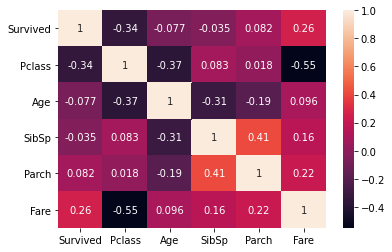

In [288]:
# Plot a correlation matrix between all numerrical columns
correlation = train.corr()
sns.heatmap(correlation, annot=True)

The heatmap shows the correlation between all numerical features. The most interesting correlations are for the target `Survived`. The lower the `Pclass`, `Age` and `Sibsp` the higher the survival rate. Also, the higher the `Fare` and `Parch` the higher the survival rate. Moreover, we see that the older the passenger the more likely he/she is part of a higher socio-economic class (1 or 2, shown as a negative correlation). 

With this overview, we will now take a closer look at some data visualisations to better understand the Titanic passengers.

# Data visualisation


## Sex

The training dataset shows: 
- 577 males and 314 females 
- More women survived than men.
- 74% of the women survived (233 out of 314)
- 19% of the men survived (109 out of 577)

_The grey lines in the barplots show a 95% confidence interval. This means that we are 95% sure that the stated interval (the length of the error bar) captures the true mean survival rate of men and women._

male      577
female    314
Name: Sex, dtype: int64
0     81
1    233
Name: Survived, dtype: int64
0    468
1    109
Name: Survived, dtype: int64


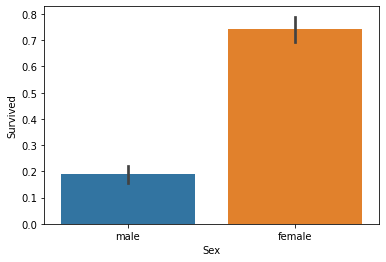

In [289]:
sns.barplot(x=train['Sex'], y=train['Survived'])

print(train['Sex'].value_counts())
print(train['Survived'][train['Sex'] == 'female'].value_counts(sort=False))
print(train['Survived'][train['Sex'] ==   'male'].value_counts(sort=False))

## Pclass
The socio-economic status has an impact on the passenger's survival chances. The lower the class the lower the chances of survival.

0     80
1    136
Name: Survived, dtype: int64
0    97
1    87
Name: Survived, dtype: int64
0    372
1    119
Name: Survived, dtype: int64


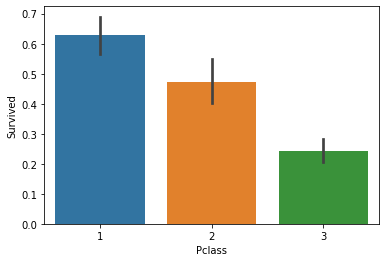

In [290]:
sns.barplot(x=train.Pclass, y=train.Survived)
print(train['Survived'][train['Pclass'] == 1].value_counts(sort=False))
print(train['Survived'][train['Pclass'] == 2].value_counts(sort=False))
print(train['Survived'][train['Pclass'] == 3].value_counts(sort=False))

## Cabin
- The average survival rate for passengers with a cabin is 66.67%.
- For passengers without a cabin it is 30%.
- The cabin feature could be an important feature to predict survival rate.
- We will encode it binary (0=no cabin, 1=cabin).

`Cabin` x `Pclass`:
- Most missing cabin numbers are from passengers with a lower class (2 or 3). 
- Thus, we can infer that a missing cabin number means that the passenger had no cabin. 
- Having a cabin was mostly reserved for first class passengers.

In [291]:
# Average surival rate among passengers with and without a cabin 
mean_survival_cabin = train[train.Cabin.notna()].Survived.mean()
mean_survival_no_cabin = train[train.Cabin.isna()].Survived.mean()

print(mean_survival_cabin)
print(mean_survival_no_cabin)

0.6666666666666666
0.29985443959243085


1    0.814815
2    0.086957
3    0.024440
Name: Pclass, dtype: float64


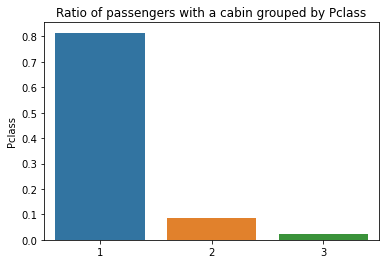

In [292]:
# No. of passengers with a cabin grouped by Pclass
pclass_cabin = train.Pclass[train.Cabin.notna()].value_counts(sort=False)

# No. of all passengers grouped by Pclass
pclass = train.Pclass.value_counts(sort=False)

# Barplot without cabins
sns.barplot(y=pclass_cabin/pclass, x=[1,2,3])
plt.title('Ratio of passengers with a cabin grouped by Pclass')

print(pclass_cabin/pclass)

## Sibsp
- Passengers with 1 sibling or spouse have the highest survival chance on average. 
- The more siblings or spouses one has, the lower the chances. Probably this applies to children.

_The long error bars stem from the low sample size._

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64


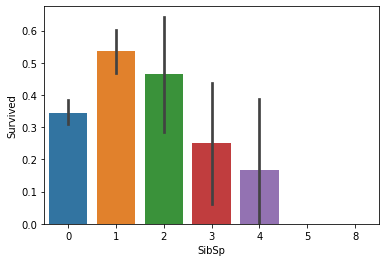

In [293]:
# Average survival rate for each number of SibSp
print(train.groupby('SibSp').Survived.mean())

# No. of passengers with grouped by SipSp
print(train.groupby('SibSp').Survived.count())

# Barplot
sns.barplot(x=train.SibSp, y=train.Survived)

## Parch
This plot shows that passengers with no parents or children had the lowest survival rate. Passengers with 1 or parents or children could indeed be children. 

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64


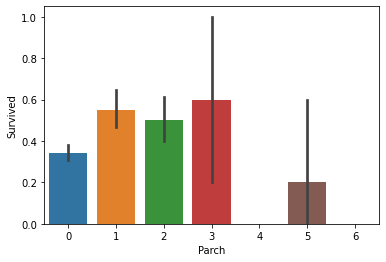

In [294]:
# Average survival rate grouped by number of parents or children
print(train.groupby('Parch').Survived.mean())

# No. of passengers grouped by number of parents or children
print(train.groupby('Parch').Survived.count())

# Barplot
sns.barplot(x=train.Parch, y=train.Survived)

## Embarked
- Passengers who embarked in Cherourg were more likely to survive. 
- The cross table between Embarked and Pclass shows that many high-class passengers embarked at C. which could explain the high survival rate. 
- We also see that the majority embarked in S where also 40% of all low-class passengers embarked.

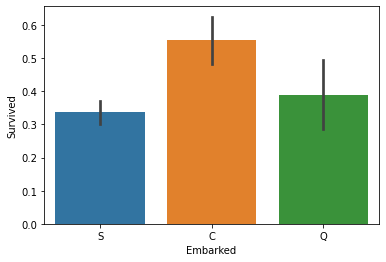

In [295]:
sns.barplot(x=train.Embarked, y=train.Survived)

Text(0.5, 1.0, 'Cross-table: Embarked x Pclass')

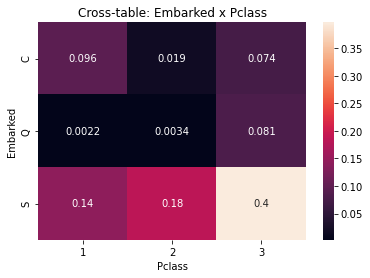

In [296]:
cross = pd.crosstab(train.Embarked, train.Pclass, normalize=True)
# normalize=True means that all fields will sum up to 1
sns.heatmap(cross, annot=True)
plt.title('Cross-table: Embarked x Pclass')

## Age
We see that babies had the highest survival rate,  seniors the lowest. The survival rate for other age groups is very similar.

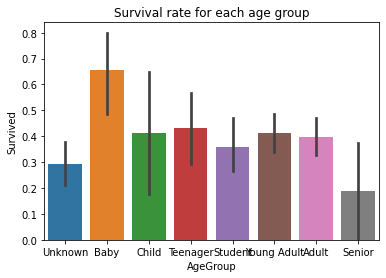

In [297]:
#fill missing age values (NA) with -0.5 so they don't distort the analysis
X_train['Age'] = X_train['Age'].fillna(-0.5)
X_valid['Age'] = X_valid['Age'].fillna(-0.5)

#segment the ages into bins
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child','Teenager',
          'Student','Young Adult','Adult','Senior']

#Here we add a new column 'AgeGroup' to the X_train and X_valid dataframes
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins, labels = labels)
X_valid['AgeGroup'] = pd.cut(X_valid['Age'], bins, labels = labels)

#draw bar plot
sns.barplot(x=X_train.AgeGroup, y=y_train)
plt.title('Survival rate for each age group')
plt.show()

# Data Cleaning
## Impute missing Ages
The age feature is an important predictor. Therefore, we need to fix the 177 missing ages. We will look for the age mode for each title. For instance, all passengers with the title 'Mr.' fall in the age group of young adult.

In [298]:
# Extract the title from the name with regex
X_train['Title'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
X_valid['Title'] = X_valid['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

pd.crosstab(X_train['Title'], y_train)

# We get the common SettingWithCopyWarning here.
# If you know how to fix it, please let me know.

Survived,0,1
Title,,
Capt,1,0
Countess,0,1
Dr,2,1
Lady,0,1
Major,1,1
Master,14,19
Miss,40,92
Mlle,0,2
Mme,0,1


In [299]:
# No. of missing ages for each title group
X_train[X_train.Age.isna()].Title.value_counts()

Series([], Name: Title, dtype: int64)

In [300]:
# Replace various titles with more common names
X_train['Title'] = X_train['Title'].replace(
    ['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')

X_train['Title'] = X_train['Title'].replace(['Countess','Lady','Sir'], 'Royal')
X_train['Title'] = X_train['Title'].replace('Mlle', 'Miss')
X_train['Title'] = X_train['Title'].replace('Ms', 'Miss')
X_train['Title'] = X_train['Title'].replace('Mme', 'Mrs')

# Replace various titles with more common names
X_valid['Title'] = X_valid['Title'].replace(
    ['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')

X_valid['Title'] = X_valid['Title'].replace(['Countess','Lady','Sir'], 'Royal')
X_valid['Title'] = X_valid['Title'].replace('Mlle', 'Miss')
X_valid['Title'] = X_valid['Title'].replace('Ms', 'Miss')
X_valid['Title'] = X_valid['Title'].replace('Mme', 'Mrs')

In [301]:
# Fill missing age with mode age group for each title
mr_age     = X_train[X_train['Title'] == 'Mr']['AgeGroup'].mode() #young adult
miss_age   = X_train[X_train['Title'] == 'Miss']['AgeGroup'].mode() #baby
mrs_age    = X_train[X_train['Title'] == 'Mrs']['AgeGroup'].mode() #adult
master_age = X_train[X_train['Title'] == 'Master']['AgeGroup'].mode() #baby
royal_age  = X_train[X_train['Title'] == 'Royal']['AgeGroup'].mode() #adult
rare_age   = X_train[X_train['Title'] == 'Rare']['AgeGroup'].mode() #adult

# Based on the mode AgeGroup for each Title we map the missing AgeGroups
age_title_mapping = {'Mr':mr_age, 'Miss':miss_age, 'Mrs':mrs_age,
                     'Master':master_age, 'Royal':royal_age, 'Rare':rare_age}

# Assign the missing age groups according to the title.
# For instance, a passenger with title Mister and unknown age will be 
# assigned to AgeGroup 'Young Adult'.
for x in X_train['AgeGroup'].index:
    if X_train['AgeGroup'][x] == 'Unknown':
        X_train['AgeGroup'][x] = age_title_mapping[X_train['Title'][x]]
        
#for x in test['AgeGroup'].index:
#    if test['AgeGroup'][x] == 'Unknown':
#        test['AgeGroup'][x] = age_title_mapping[test['Title'][x]]

In [302]:
# Fill missing age with mode age group for each title
mr_age     = X_valid[X_valid['Title'] == 'Mr']['AgeGroup'].mode() #young adult
miss_age   = X_valid[X_valid['Title'] == 'Miss']['AgeGroup'].mode() #baby
mrs_age    = X_valid[X_valid['Title'] == 'Mrs']['AgeGroup'].mode() #adult
master_age = X_valid[X_valid['Title'] == 'Master']['AgeGroup'].mode() #baby
royal_age  = X_valid[X_valid['Title'] == 'Royal']['AgeGroup'].mode() #adult
rare_age   = X_valid[X_valid['Title'] == 'Rare']['AgeGroup'].mode() #adult

# Based on the mode AgeGroup for each Title we map the missing AgeGroups
age_title_mapping = {'Mr':mr_age, 'Miss':miss_age, 'Mrs':mrs_age,
                     'Master':master_age, 'Royal':royal_age, 'Rare':rare_age}

# Assign the missing age groups according to the title.
# For instance, a passenger with title Mister and unknown age will be 
# assigned to AgeGroup 'Young Adult'.
for x in X_valid['AgeGroup'].index:
    if X_valid['AgeGroup'][x] == 'Unknown':
        X_valid['AgeGroup'][x] = age_title_mapping[X_valid['Title'][x]]
        
#for x in test['AgeGroup'].index:
#    if test['AgeGroup'][x] == 'Unknown':
#        test['AgeGroup'][x] = age_title_mapping[test['Title'][x]]

## Convert Cabins to 0s and 1s
There are many unique cabin numbers. Therefore, I am going to clean up the dataset by converting all cabin numbers to 1 and any `NaN`s to 0. This helps us to target encode the `Cabin` feature.

In [303]:
# Copy
X_train['Cabin_01'] = X_train['Cabin'].copy()
X_valid['Cabin_01'] = X_valid['Cabin'].copy()

# Replace cabin numbers with 1 and NAs with 0
X_train['Cabin_01'].replace(to_replace='.*', value=1, regex=True, inplace=True)
X_train['Cabin_01'].fillna(0, inplace=True)

X_valid['Cabin_01'].replace(to_replace='.*', value=1, regex=True, inplace=True)
X_valid['Cabin_01'].fillna(0, inplace=True)

X_train.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,Cabin_01
PassengerId,,,,,,,,,,,,,
106,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S,Young Adult,Mr,0.0
69,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Teenager,Miss,0.0
254,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S,Young Adult,Mr,0.0
321,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S,Student,Mr,0.0
707,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S,Adult,Mrs,0.0


# Encoding Categorical Values
Here, we will compare several encodings and measure their performance with a predefined function. The encoding with the lowest average error will be selected.

In [304]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

## One-Hot Encoding
One-hot encoding creates an additional column for each unique value. Every column either takes on the value 1 or 0 depending on whether that row contains that value. In the example below, we encode the `Embarked` feature.

OH encoding is a suitable encoder for data which is not ordinal but nominal, e.g. colors, countries etc. And it should only be applied when the number of unique values is small, say < 10. Otherwise, we get a sparse matrix which can reduce the accuracy of the chosen prediction model.

In [190]:
pd.get_dummies(train.Embarked).head(3)

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1


In [305]:
from sklearn.preprocessing import OneHotEncoder

# Copy to prevent SettingWithCopyWarning
X_train_OH = X_train.copy()
X_valid_OH = X_valid.copy()

# Replace NaNs with 'None'
X_train_OH['Embarked'].fillna('None',inplace=True)
object_cols = ['Embarked', 'Sex', 'Title', 'AgeGroup', 'Cabin_01']

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_OH[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid_OH[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_train_OH = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid_OH = pd.concat([num_X_valid, OH_cols_valid], axis=1)

X_train_OH.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,0,1,...,12,13,14,15,16,17,18,19,20,21
PassengerId,,,,,,,,,,,,,,,,,,,,,
106,3,"Mionoff, Mr. Stoytcho",28.0,0,0,349207,7.8958,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
69,3,"Andersson, Miss. Erna Alexandra",17.0,4,2,3101281,7.9250,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
254,3,"Lobb, Mr. William Arthur",30.0,1,0,A/5. 3336,16.1000,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
321,3,"Dennis, Mr. Samuel",22.0,0,0,A/5 21172,7.2500,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
707,2,"Kelly, Mrs. Florence ""Fannie""",45.0,0,0,223596,13.5000,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [306]:
# Select the features
features = pd.Series(X_train_OH.columns, index=X_train_OH.columns)
features.drop(['Name','Age','Ticket','Cabin'], axis=0, inplace=True)
features = list(features)

X_train_OH = X_train_OH[features]
X_valid_OH = X_valid_OH[features]

# Get score
score_OH = score_dataset(X_train_OH, X_valid_OH, y_train, y_valid)
score_OH

0.22713721641352871

**Challenge of One-Hot Encoding**

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. Here, I will practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

## Label Encoding
Label Encoding assign to each unique value an integer. This encoding technique should only be sued for ordinal data where we can order the data in some way (e.g. 'never', 'rarely', 'often'). Assigning integers to nominal data (e.g. countries) could cause the model to understand misleading relationships (e.g. that one country is better or worse than another).

On first sight, there seems no reasonable feature that should be encoded in this way. We will still encode `[Embarked, Sex, Title, AgeGroup]` to see how this encoding compares to other techniques.

In [307]:
from sklearn.preprocessing import LabelEncoder

# Copy
X_train_label = X_train.copy()
X_valid_label = X_valid.copy()

# Apply Label Encoder
label_encoder = LabelEncoder()

# Define features to be encoded
object_cols = ['Embarked', 'Sex', 'Title', 'AgeGroup']

# Need to replace NaNs with a string for the encoder to work
X_train.Embarked.fillna('None',inplace=True)

for col in object_cols:
    X_train_label[col] = label_encoder.fit_transform(X_train[col])
    X_valid_label[col] = label_encoder.fit_transform(X_valid[col])

X_train_label.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,Cabin_01
PassengerId,,,,,,,,,,,,,
106,3,"Mionoff, Mr. Stoytcho",1,28.0,0,0,349207,7.8958,NaN,3,7,2,0.0
69,3,"Andersson, Miss. Erna Alexandra",0,17.0,4,2,3101281,7.9250,NaN,3,5,1,0.0
254,3,"Lobb, Mr. William Arthur",1,30.0,1,0,A/5. 3336,16.1000,NaN,3,7,2,0.0
321,3,"Dennis, Mr. Samuel",1,22.0,0,0,A/5 21172,7.2500,NaN,3,4,2,0.0
707,2,"Kelly, Mrs. Florence ""Fannie""",0,45.0,0,0,223596,13.5000,NaN,3,0,3,0.0


In [308]:
# Select the features
features = pd.Series(X_train_label.columns, index=X_train_label.columns)
features.drop(['Name','Age','Ticket','Cabin'], axis=0, inplace=True)
features = list(features)

X_train_label = X_train_label[features]
X_valid_label = X_valid_label[features]

score_label = score_dataset(X_train_label, X_valid_label, y_train, y_valid)
score_label

0.2248659348872353

## Target Encoding

Target Encoding assigns to each categorial value the corresponding mean target value. For instance, 19% of the men survived which converts all rows where `Sex == 'male'` to `0.19`. 

In [309]:
from category_encoders import TargetEncoder

# Select columns to be target encoded
object_cols = ['Embarked', 'Sex', 'Title', 'AgeGroup', 'Cabin_01']

target_encoder = TargetEncoder(cols=object_cols)

X_train_target = target_encoder.fit_transform(X_train, y_train)
X_valid_target = target_encoder.transform(X_valid, y_valid)
X_train_target.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,Cabin_01
PassengerId,,,,,,,,,,,,,
106,3,"Mionoff, Mr. Stoytcho",0.192220,28.0,0,0,349207,7.8958,NaN,0.344898,0.301587,0.157360,0.305284
69,3,"Andersson, Miss. Erna Alexandra",0.753247,17.0,4,2,3101281,7.9250,NaN,0.344898,0.431373,0.703704,0.305284
254,3,"Lobb, Mr. William Arthur",0.192220,30.0,1,0,A/5. 3336,16.1000,NaN,0.344898,0.301587,0.157360,0.305284
321,3,"Dennis, Mr. Samuel",0.192220,22.0,0,0,A/5 21172,7.2500,NaN,0.344898,0.357143,0.157360,0.305284
707,2,"Kelly, Mrs. Florence ""Fannie""",0.753247,45.0,0,0,223596,13.5000,NaN,0.344898,0.437126,0.819149,0.305284


In [310]:
# Select the features
features = pd.Series(X_train_target.columns, index=X_train_target.columns)
features.drop(['Name','Age','Ticket','Cabin'], axis=0, inplace=True)
features = list(features)

X_train_target = X_train_target[features]
X_valid_target = X_valid_target[features]

score_target = score_dataset(X_train_target, X_valid_target, y_train, y_valid)
score_target

0.22706859519916758

## Count Encoding
Count encoding replaces each categorical value with the number of times it appears in the dataset. For example, if the value "GB" occured 10 times in the country feature, then each "GB" would be replaced with the number 10.

In [311]:
from category_encoders import CountEncoder
count_encoder = CountEncoder()

# Copy
X_train_count = X_train.copy()
X_valid_count = X_valid.copy()

object_cols = ['Embarked', 'Sex', 'Title', 'AgeGroup', 'Cabin_01']

X_train_count = count_encoder.fit_transform(X_train[object_cols])
X_valid_count = count_encoder.transform(X_valid[object_cols])

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_train_count = pd.concat([num_X_train, X_train_count], axis=1)
X_valid_count = pd.concat([num_X_valid, X_valid_count], axis=1)

X_valid_count.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,Title,AgeGroup,Cabin_01
PassengerId,,,,,,,,,,,,,
496,3,"Yousseff, Mr. Gerious",-0.5,0,0,2627,14.4583,NaN,116,437,394,252,0.0
649,3,"Willey, Mr. Edward",-0.5,0,0,S.O./P.P. 751,7.5500,NaN,490,437,394,252,0.0
279,3,"Rice, Master. Eric",7.0,4,1,382652,29.1250,NaN,60,437,33,17,0.0
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",-0.5,1,0,PC 17569,146.5208,B78,116,231,94,252,1.0
256,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",29.0,0,2,2650,15.2458,NaN,116,231,94,252,0.0


In [312]:
# Include all features, except Name, Age, Ticket, Cabin
features = pd.Series(X_train_count.columns, index=X_train_count.columns)
features.drop(['Name','Age','Ticket','Cabin'], axis=0, inplace=True)
features = list(features)

X_train_count = X_train_count[features]
X_valid_count = X_valid_count[features]

score_count = score_dataset(X_train_count, X_valid_count, y_train, y_valid)
score_count

0.22942551194958213

## Comparing
We see that one-hot and target encoding are performing better than label encoding. The difference between the first two encoders is very small. In the next step, I will try to use both encoders to improve the score further.

In [313]:
# Compare the different encoders
scores = [score_OH, score_label, score_target, score_count]
encoders = ['OH', 'label', 'target', 'count']
encoders_df = pd.DataFrame(data=scores, index=encoders)
encoders_df.sort_values(by=0)

,0
label,0.224866
target,0.227069
OH,0.227137
count,0.229426


## Combining Multiple Encoders

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder




# Modeling

In [114]:
from xgboost import XGBClassifier
my_model = XGBClassifier(n_estimators=1000, learning_rate=0.10, n_jobs=4)
my_model.fit(X_train, y_train, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(predictions, y_valid)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 0.16759776536312848


In [127]:
from xgboost import XGBClassifier

my_model = XGBClassifier(n_estimators=1000, learning_rate=0.10, n_jobs=4)
my_model.fit(X_train, y_train, verbose=False)
predictions = my_model.predict(X_test)
print(len(predictions))
print(len(test.PassengerId))

418
418


In [128]:
# set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : test.PassengerId, 'Survived': predictions })
output.to_csv('submission.csv', index=False)